In [90]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from pylab import rcParams

In [91]:
#Reading the files
train=pd.read_csv('Projects/Cab_Booking/Dataset/train.csv')
test=pd.read_csv('Projects/Cab_Booking/Dataset/test.csv')
train_label=pd.read_csv('Projects/Cab_Booking/Dataset/train_label.csv',header=None)
test_label=pd.read_csv('Projects/Cab_Booking/Dataset/test_label.csv',header=None)

In [92]:
#  combining the indepedent and target variables
train['totalbooking']=train_label
test['totalbooking']=test_label

In [93]:
print(train.shape)
print(test.shape)

(8708, 10)
(2178, 10)


# Feature Engineering

In [94]:
# datetime seperation into date and hour columns
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['hour']=train.datetime.apply(lambda x:x.split()[1].split(':')[0])
test['date']=test.datetime.apply(lambda x:x.split()[0])
test['hour']=test.datetime.apply(lambda x:x.split()[1].split(':')[0])
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour
7717,11/19/2012 19:00,Winter,0,1,Mist + Cloudy,16.40,20.455,58,19.0012,406,11/19/2012,19
3833,3/14/2011 12:00,Spring,0,1,Clear + Few clouds,15.58,19.695,37,0.0000,94,3/14/2011,12
2860,4/7/2011 8:00,Summer,0,1,Clear + Few clouds,14.76,17.425,76,12.9980,314,4/7/2011,8


In [95]:
# date column from object to datetime series
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour
4643,6/14/2011 20:00,Summer,0,1,Clear + Few clouds,24.60,31.06,56,11.0014,297,2011-06-14,20
4172,4/17/2011 0:00,Summer,0,0,Mist + Cloudy,18.04,21.97,77,19.0012,33,2011-04-17,0
1836,6/18/2012 2:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,15.0013,9,2012-06-18,2


In [96]:
# seperating month,weekday amd year from the date column
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
test['month'] = test['date'].dt.month
test['weekday'] = test['date'].dt.weekday
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
5894,3/1/2012 18:00,Spring,0,1,Clear + Few clouds,22.14,25.760,34,23.9994,525,2012-03-01,18,3,3,2012
803,2/16/2011 12:00,Spring,0,1,Clear + Few clouds,15.58,19.695,32,22.0028,86,2011-02-16,12,2,2,2011
6578,3/6/2011 12:00,Spring,0,0,Mist + Cloudy,18.86,22.725,94,22.0028,79,2011-03-06,12,3,6,2011


In [97]:
#changing the hour data type
train['hour']=train['hour'].astype(int)
test['hour']=test['hour'].astype(int)
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
2186,11/10/2012 7:00,Winter,0,0,Clear + Few clouds,10.66,13.635,87,7.0015,71,2012-11-10,7,11,5,2012
5959,1/5/2011 10:00,Spring,0,1,Clear + Few clouds,9.02,9.850,37,22.0028,57,2011-01-05,10,1,2,2011
6849,8/12/2011 2:00,Fall,0,1,Clear + Few clouds,25.42,31.060,57,12.9980,15,2011-08-12,2,8,4,2011


In [98]:
# drop datatime column
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)
train.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
7886,Spring,0,1,Clear + Few clouds,8.20,9.85,51,12.9980,1,2011-02-16,4,2,2,2011
3521,Winter,0,1,"Light Snow, Light Rain",26.24,28.79,89,7.0015,39,2012-10-04,5,10,3,2012
2055,Spring,0,1,Clear + Few clouds,17.22,21.21,77,15.0013,29,2012-03-08,5,3,3,2012


In [99]:
#seperation of weather into two columns
train[['weather1','weather2']] = train["weather"].str.split('[+|,]',n =1, expand = True)
test[['weather1','weather2']] = test["weather"].str.split('[+|,]',n =1, expand = True)
train.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
3603,Fall,0,1,Clear + Few clouds,28.70,31.820,45,12.998,218,2011-07-01,21,7,4,2011,Clear,Few clouds
3107,Fall,0,1,Clear + Few clouds,28.70,32.575,65,0.000,397,2011-08-15,19,8,0,2011,Clear,Few clouds
3211,Fall,0,0,Clear + Few clouds,18.04,21.970,82,12.998,36,2011-09-18,3,9,6,2011,Clear,Few clouds


In [100]:
# drop the weather column
train=train.drop('weather',axis=1)
test=test.drop('weather',axis=1)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
5206,Winter,0,1,18.86,22.725,67,11.0014,9,2012-12-05,2,12,2,2012,Clear,Few clouds
1872,Spring,0,1,22.96,26.515,68,11.0014,201,2012-03-19,11,3,0,2012,Clear,Few clouds
3106,Summer,0,1,23.78,27.275,78,6.0032,129,2012-05-14,22,5,0,2012,Mist,Cloudy


In [101]:
#removing the holiday and workingday that are same  
train = train.loc[(train['holiday'] == 0) & (train['workingday'] != 0)] 
test = test.loc[(test['holiday'] == 0) & (test['workingday'] != 0)] 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
4734,Winter,0,1,16.40,20.455,76,0.0000,315,2011-10-03,19,10,0,2011,Clear,Few clouds
274,Summer,0,1,23.78,27.275,88,11.0014,32,2011-06-07,5,6,1,2011,Clear,Few clouds
278,Spring,0,1,6.56,9.090,64,7.0015,8,2011-02-01,0,2,1,2011,Mist,Cloudy


In [102]:
# some data of windspeed has no values filling those values with mean
#train['windspeed']=train['windspeed'].replace(to_replace=0.0000,value=train['windspeed'].mean())
#test['windspeed']=test['windspeed'].replace(to_replace=0.0000,value=test['windspeed'].mean())
#train.sample(3)

In [103]:
# date column is not need because we are have those info in other columns
train=train.drop('date',axis=1)
test=test.drop('date',axis=1)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
3379,Summer,0,1,24.60,29.545,69,11.0014,653,8,6,4,2012,Clear,Few clouds
160,Fall,0,1,31.16,34.090,40,7.0015,677,19,8,3,2012,Clear,Few clouds
91,Fall,0,1,29.52,34.850,79,7.0015,43,0,7,0,2012,Light Snow,Light Rain


In [104]:
# the temp and actual temp as high correlation we can remove any one of them
print(train['temp'].corr(train['atemp']))
train=train.drop('temp',axis=1)
test=test.drop('temp',axis=1)
train.sample(3)

0.9797856252890171


,season,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
5666,Summer,0,1,12.880,93,12.9980,7,2,4,4,2011,Light Snow,Light Rain
2925,Spring,0,1,21.210,77,23.9994,334,7,3,3,2012,Clear,Few clouds
270,Spring,0,1,22.725,88,7.0015,579,8,3,0,2012,Clear,Few clouds


In [105]:
print(train.shape)
print(test.shape)

(5924, 13)
(1488, 13)


# Outlier analysis

In [106]:
train.describe()

,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year
count,5924.0,5924.0,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000
mean,0.0,1.0,23.808046,61.527009,12.917074,194.535955,11.589298,6.525321,2.043552,2011.502870
std,0.0,0.0,8.436218,19.248119,8.174576,184.835890,6.867819,3.412820,1.390664,0.500034
min,0.0,1.0,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000
25%,0.0,1.0,16.665000,47.000000,7.001500,43.000000,6.000000,4.000000,1.000000,2011.000000
50%,0.0,1.0,24.240000,61.000000,12.998000,153.000000,12.000000,6.000000,2.000000,2012.000000
75%,0.0,1.0,31.060000,77.000000,19.001200,280.000000,17.000000,9.000000,3.000000,2012.000000
max,0.0,1.0,43.940000,100.000000,51.998700,977.000000,23.000000,12.000000,4.000000,2012.000000


In [107]:
rcParams['figure.figsize'] = 16,8 # fixing the size for all plots

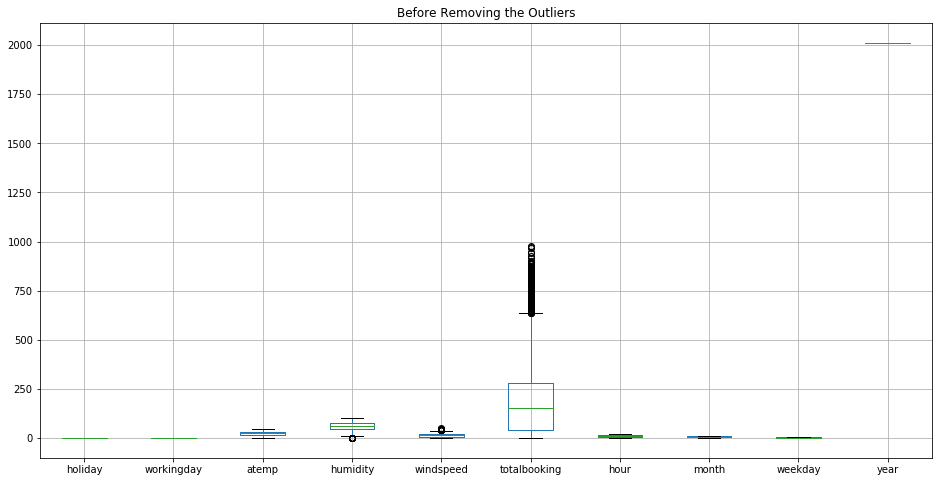

In [108]:
train.boxplot()
plt.title('Before Removing the Outliers')
plt.show()

In [109]:
Q1 = train.quantile(0.15)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
Q1t = test.quantile(0.15)
Q3t = test.quantile(0.75)
IQRt = Q3t - Q1t
test = test[~((test < (Q1t - 1.5 * IQRt)) |(test > (Q3t + 1.5 * IQRt))).any(axis=1)]

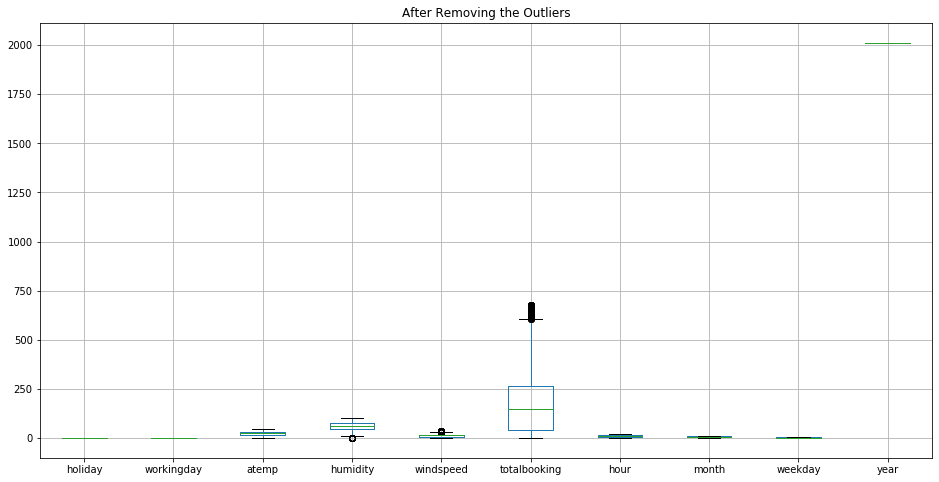

In [110]:
train.boxplot()
plt.title('After Removing the Outliers')
plt.show()

In [111]:
train.describe()

,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year
count,5727.0,5727.0,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000
mean,0.0,1.0,23.629732,61.835865,12.761601,177.407369,11.468483,6.508294,2.049240,2011.488214
std,0.0,0.0,8.414844,19.213180,7.942817,156.775847,6.906289,3.432533,1.392066,0.499905
min,0.0,1.0,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000
25%,0.0,1.0,16.665000,47.000000,7.001500,40.000000,6.000000,4.000000,1.000000,2011.000000
50%,0.0,1.0,24.240000,61.000000,12.998000,147.000000,11.000000,6.000000,2.000000,2011.000000
75%,0.0,1.0,31.060000,77.000000,16.997900,266.000000,17.000000,10.000000,3.000000,2012.000000
max,0.0,1.0,43.940000,100.000000,36.997400,679.000000,23.000000,12.000000,4.000000,2012.000000


In [112]:
print(train.shape)
print(test.shape)

(5727, 13)
(1422, 13)


# Correlation Analysis

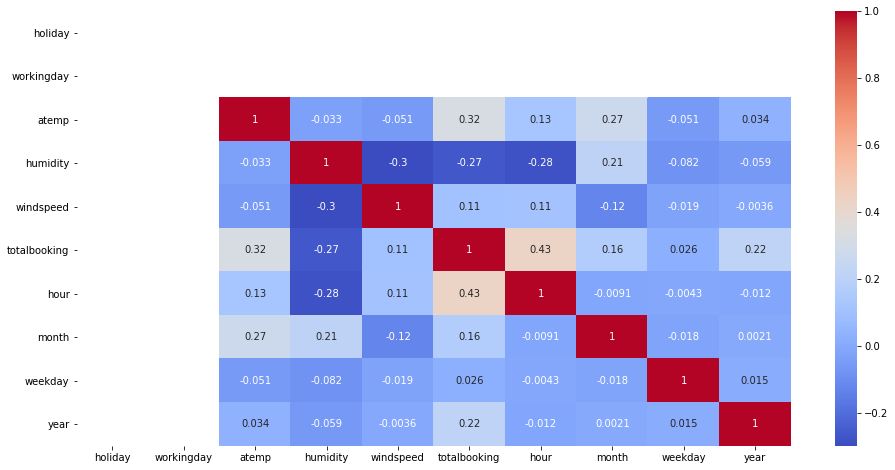

In [113]:
corrmat = train.corr()
top_corr_features = corrmat.index
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='coolwarm')

In [114]:
# as there is no correlation in holiday and weekday 
# date column is not need because we are have those info in other columns
train=train.drop(['holiday','workingday'],axis=1)
test=test.drop(['holiday','workingday'],axis=1)
train.sample(3)

,season,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
1476,Spring,21.97,72,19.0012,7,2,2,4,2011,Clear,Few clouds
2582,Winter,21.97,77,15.0013,400,8,10,1,2011,Clear,Few clouds
2164,Spring,15.91,39,12.9980,224,18,3,1,2011,Clear,Few clouds


# Visualizing the data

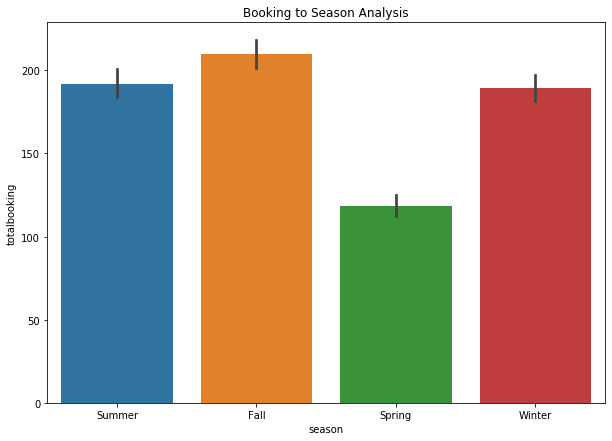

In [115]:
plt.figure(figsize=(10,7))
sns.barplot(x='season',y='totalbooking',data=train)
plt.title('Booking to Season Analysis')
plt.show()

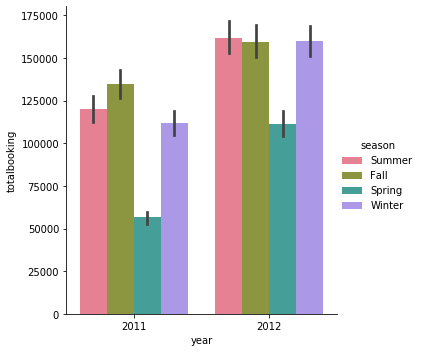

In [116]:
sns.catplot(x="year", y="totalbooking", hue="season", kind="bar", data=train,estimator=sum,palette='husl')

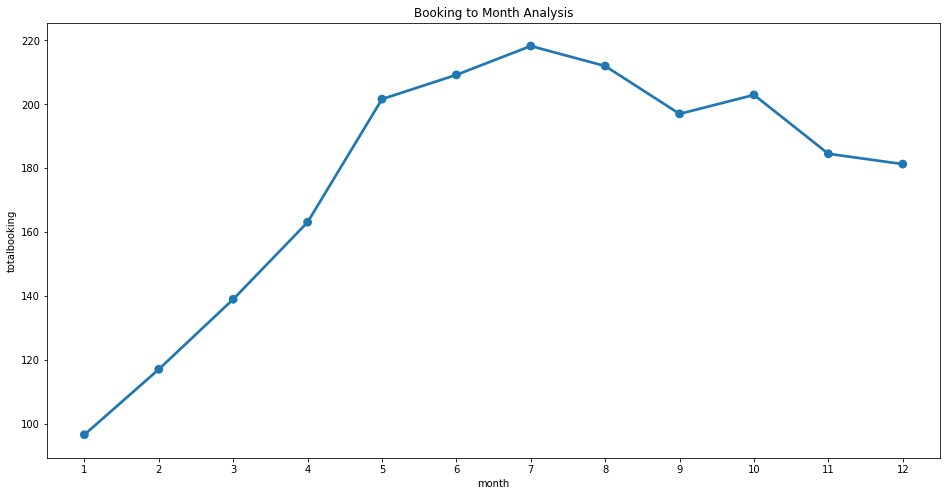

In [74]:
sns.pointplot(x='month',y='totalbooking',data=train,kind='line',ci=False)
plt.title('Booking to Month Analysis')
plt.show()

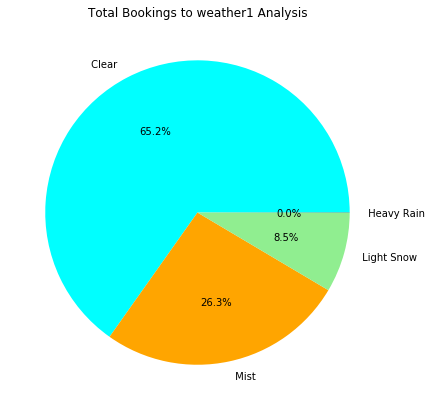

In [75]:
labels=train.weather1.unique().tolist()
colors=['cyan','orange','lightgreen','black']
values=train['weather1'].value_counts().values
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Total Bookings to weather1 Analysis')
plt.show()

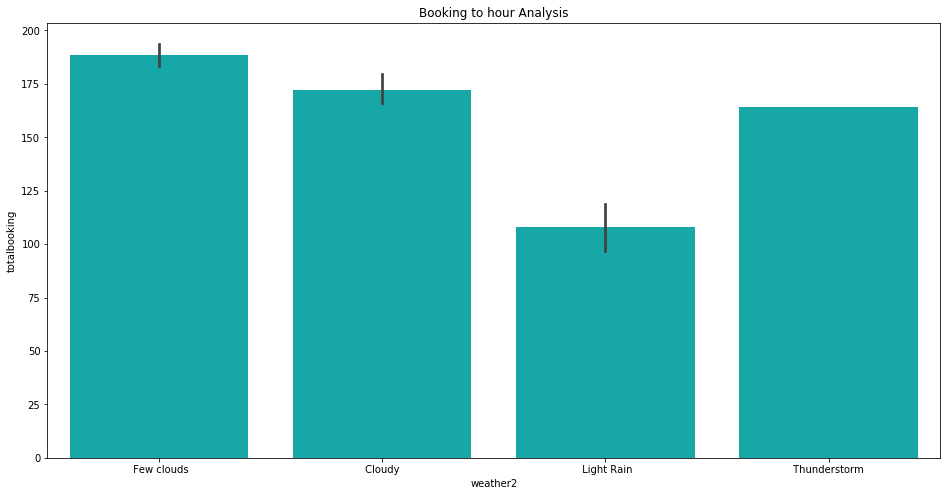

In [76]:
sns.barplot(x="weather2",y='totalbooking', data=train, color="c")
plt.title('Booking to hour Analysis')
plt.show()

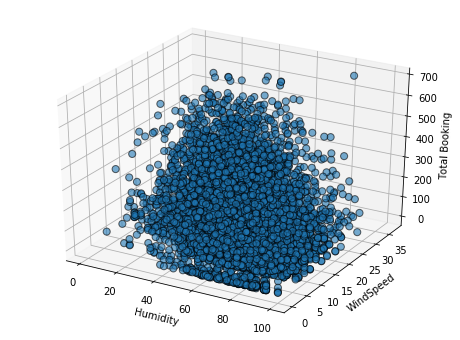

In [77]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = train['humidity']
ys = train['windspeed']
zs = train['totalbooking']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='black')

ax.set_xlabel('Humidity')
ax.set_ylabel('WindSpeed')
ax.set_zlabel('Total Booking')

plt.show()

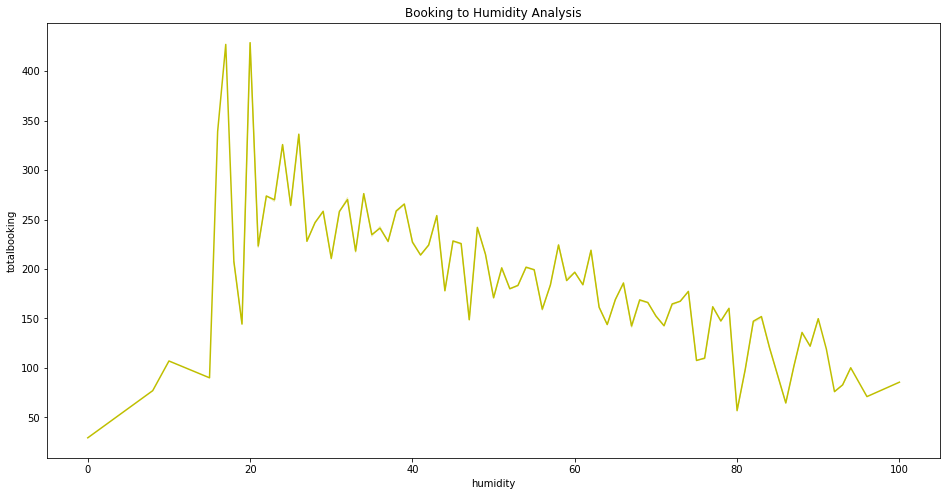

In [78]:
sns.lineplot(x = 'humidity', y  = 'totalbooking', data = train,ci=False,color='y')
plt.title('Booking to Humidity Analysis')
plt.show()

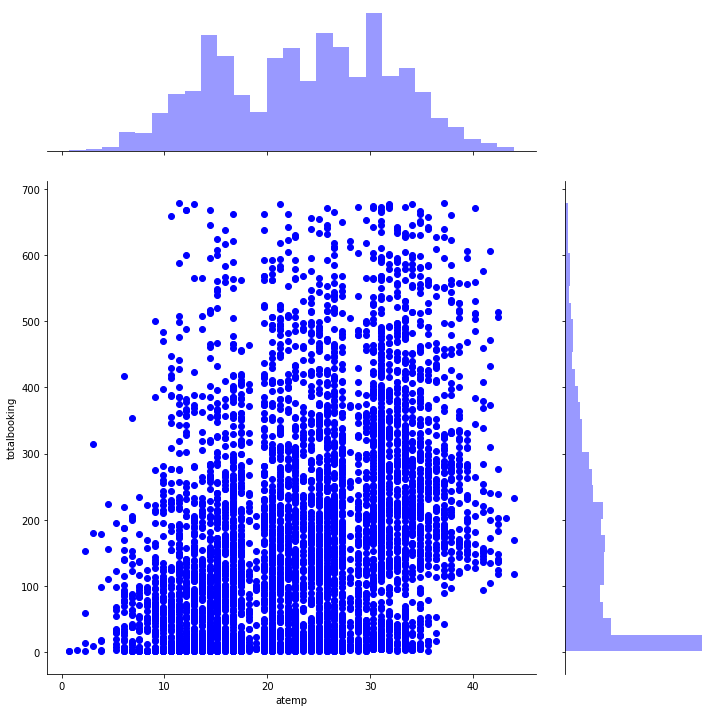

In [79]:
sns.jointplot(x="atemp", y="totalbooking", data=train, height=10, ratio=3, color="blue")
plt.show()

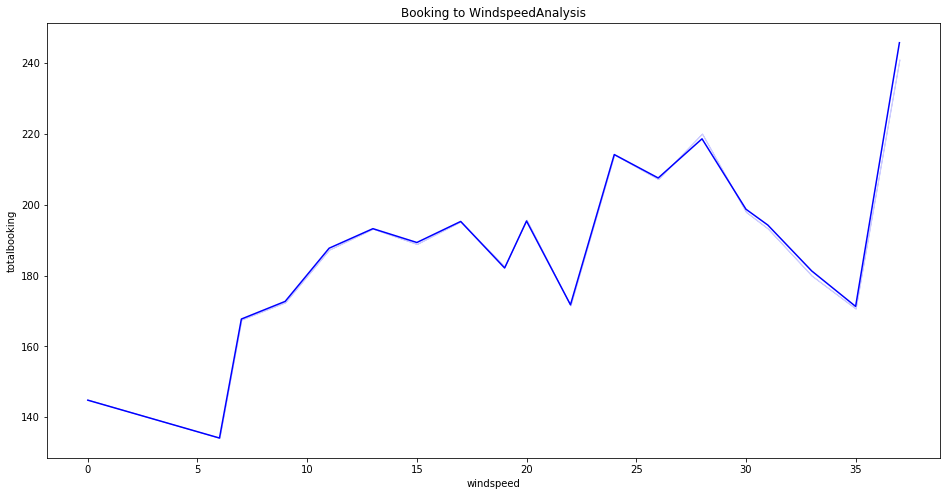

In [80]:
sns.lineplot(x = 'windspeed', y  = 'totalbooking', data = train,ci=False,color='blue')
plt.title('Booking to WindspeedAnalysis')
plt.show()

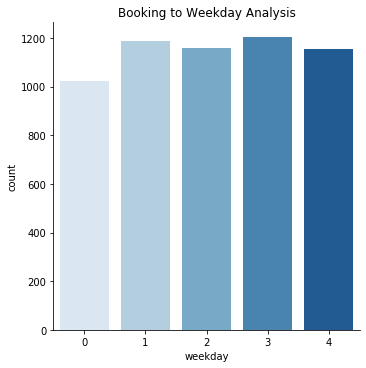

In [81]:
sns.catplot(x='weekday', kind='count', palette='Blues', data=train)
plt.title('Booking to Weekday Analysis')
plt.show()

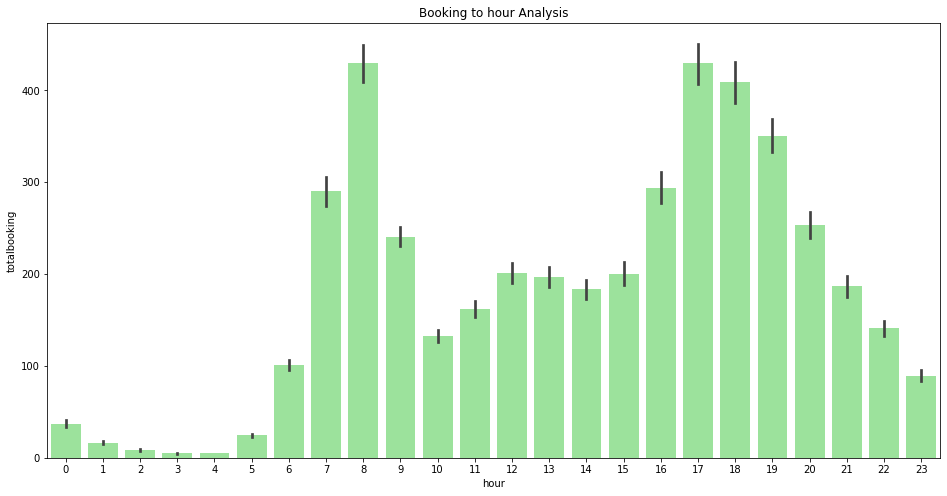

In [82]:
sns.barplot(x="hour",y='totalbooking', data=train, color="lightgreen")
plt.title('Booking to hour Analysis')
plt.show()

C:\Users\mugesh\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


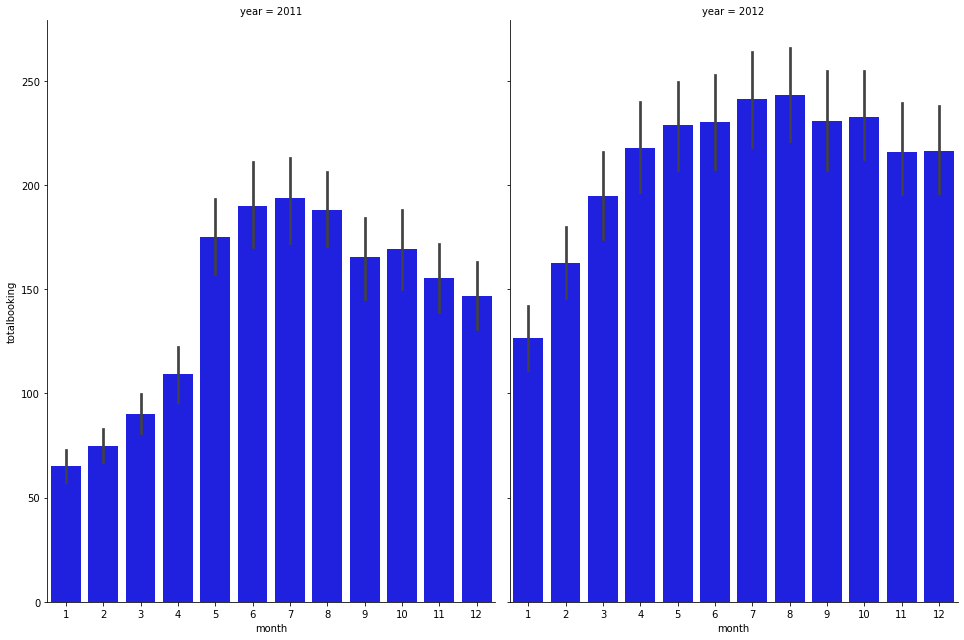

In [83]:
g = sns.FacetGrid(train, col='year', height=9, aspect=0.75)
g.map(sns.barplot, "month", "totalbooking",color='b')

# Encoding the Categorical Variables

In [84]:
label=LabelEncoder()
train[['season','weather1','weather2']]=train[['season','weather1','weather2']].apply(label.fit_transform)
test[['season','weather1','weather2']]=test[['season','weather1','weather2']].apply(label.fit_transform)
train.sample(3)

,season,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
2766,1,22.725,82,12.9980,24,5,3,1,2012,3,0
4397,3,15.910,76,11.0014,166,10,12,4,2012,3,0
2163,3,16.665,57,11.0014,82,23,11,3,2011,3,0


In [85]:
# splitting the independent and target variable
x=train.drop('totalbooking',axis=1)
Y=train['totalbooking'].values
x_test=test.drop('totalbooking',axis=1)
Y_test=test['totalbooking'].values

# Regression Analysis

In [86]:
# linear Regression
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x,Y)
predl=linear_model.predict(x_test)
print('R2_SCORE OF LINEAR REGRESSION    :',np.round(r2_score(Y_test,predl),2))

R2_SCORE OF LINEAR REGRESSION    : 0.35


In [87]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x,Y)
pred_tree=tree.predict(x_test)
print('R2_SCORE OF DECISION TREE REGRESSOR    :',np.round(r2_score(Y_test,pred_tree),2))

R2_SCORE OF DECISION TREE REGRESSOR    : 0.9


# Ensemble model

In [63]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_jobs=-1)
parameters = {'n_estimators':np.arange(80,140,10),'max_depth':np.arange(3,8,1)}
xgb = GridSearchCV(xgb,parameters)
xgb.fit(x,Y)
predx=xgb.predict(x_test)

In [64]:
# best fitted hyperparameters of the random forest
xgb.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [65]:
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [66]:
r2=r2_score(Y_test,predx)
mse=mean_squared_error(Y_test,predx)

In [67]:
print('R2_SCORE  :',np.round(r2,2) )
print('MSE       :',np.round(mse,2) )

R2_SCORE  : 0.95
MSE       : 1223.02
